#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Monire"
last_name= "Ameri"
student_number= "401208091"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from keras.datasets import mnist

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
#load the data set and fill nan value with 0
# TODO (load dataset)
#(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
data = np.load('C:/Users/Green.PC/Downloads/mnist.npz')
x_train = data['x_train']
x_train = np.nan_to_num(x_train, nan=0)
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

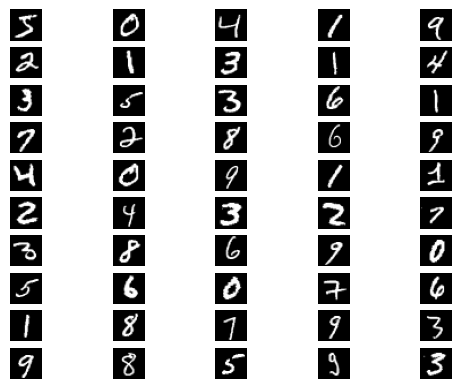

In [4]:
# here show 50 first of this images

def show_images(num_images,X):

    for i in range(0, num_images, 1):
        plt.subplot(10, 5, i+1)
        plt.imshow(X[i], cmap = 'gray')
        plt.axis('off')
    plt.show()
        
        
show_images(50, x_train)

In [5]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
#Reashape
X_TRAIN = x_train.reshape(-1,784)
#finding Max
max_X_TRAIN = np.max(X_TRAIN)
#nirmalization
scale_X_TRAIN = X_TRAIN/max_X_TRAIN 

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [6]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
#meaning data
mean_data = np.mean(scale_X_TRAIN, axis = 0)

#calculate covariance
data = (scale_X_TRAIN - mean_data)
cov_data = np.dot(data.T, data)/(len(data)-1)

#eig value
eig_values, eig_vectors = np.linalg.eig(cov_data)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [7]:
explained_variance = 0.95 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
#calculate the compression_ratio

# Sum of eigenvalues
tot_var = np.sum(eig_values)
rat_var = eig_values / tot_var
cum_rat_var = np.cumsum(rat_var)

#select Landa based on explained var
count = np.argmax(cum_rat_var >= explained_variance) + 1
new_landa = eig_vectors[:, :count]

حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

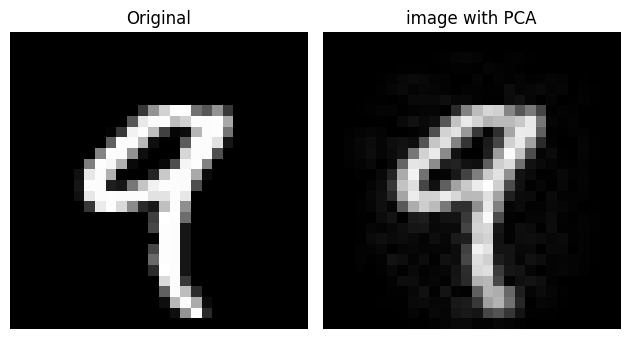

In [8]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#TODO
#plot the original data

#Convert previous data to new data
con_data = scale_X_TRAIN.dot(new_landa)
rec_data = con_data.dot(new_landa.T)
rec_images = rec_data.reshape(-1, 28, 28)

#plot the dimentionally reduced data
#original
plt.subplot(1, 2, 1)
plt.imshow(x_train[4], cmap='gray') 
plt.title('Original')
plt.axis('off')
#image with PCA
plt.subplot(1, 2, 2)
plt.imshow(np.abs(rec_images[4]), cmap='gray')
plt.title('image with PCA')
plt.axis('off')

plt.tight_layout()
plt.show()


## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [9]:
#complete below function using python PCA function
def do_pca(n_components, data):  
    #input number of component and not normalized data set.
    #output is the projected dataset
    # TODO
    if data.ndim > 2:
        data = data.reshape((data.shape[0], -1))
    #using pca of python
    PCA_data =  PCA(n_components = n_components).fit_transform(data)
    return(PCA_data)

In [10]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #using k-means for ml model
    k_means = KMeans(n_clusters=9)
    k_means.fit(X_train)
    Y = k_means.predict(X_test)
    #calculating acc(accuracy)
    acc= accuracy_score(y_test, Y)
    
    return acc

In [11]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
def plot_acc(X,Y):
    acc_list, pc_list = [], []
    for pc in range(2,101):
        #TODO
        #using do pca for calculating pca
        p_data = do_pca(pc,X)
        #using ML-Model for calculating acc
        acc = ML_model(p_data, y, print_output=False)
        #adding acc to list of acc for plotting
        acc_list.append(acc)
        #adding pc to list of pc for plotting
        pc_list.append(pc)
        
    #landing and maximum acc and max comp
    max_acc = max(acc_list)
    max_comp = pc_list[acc_list.index(max_acc)]
    #TODO
    print('Max Acc is', max_acc,'and comp is', max_comp)
    #plot the accuracy based on components.
    #TODO
    plt.plot(pc_list, acc_list)
    plt.xlabel('Num of Comp')
    plt.ylabel('Acc')
    plt.title('Acc-Num of Comp')
    plt.show()


Max Acc is 0.33866666666666667 and comp is 55


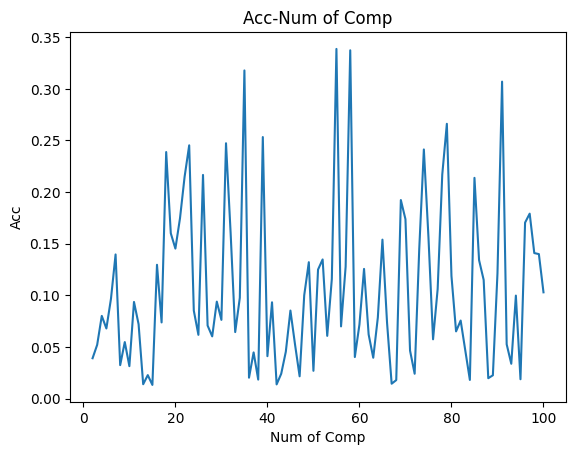

In [12]:
# Example usage
X = x_train 
y = y_train  

plot_acc(X, y)